<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run). 

## Feature: Generate Custom Schema

In this notebook, we will explore how to generate custom schemas using VLM Run. The ability to define and generate custom schemas allows organizations to tailor data extraction to their specific needs.
This flexibility is essential for handling diverse data types and ensuring that extracted information is both relevant and actionable.

You will understand how to auto-generate schemas based on your data that can be used to extract structured information from visual content, enhancing your data processing workflows.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

### Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet

## Configure VLM Run

In [2]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://dev.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

 ········


In [3]:
from vlmrun.client import VLMRun

client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

### Display testing invoice image

In [4]:
from vlmrun.common.utils import remote_image

invoice_image = remote_image("https://www.zoho.com/invoice/images/template-gallery/excel-invoice-template-1x.png")

/Users/kaushikbokka/apps/vlm-run/vlmrun-cookbook/venv/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


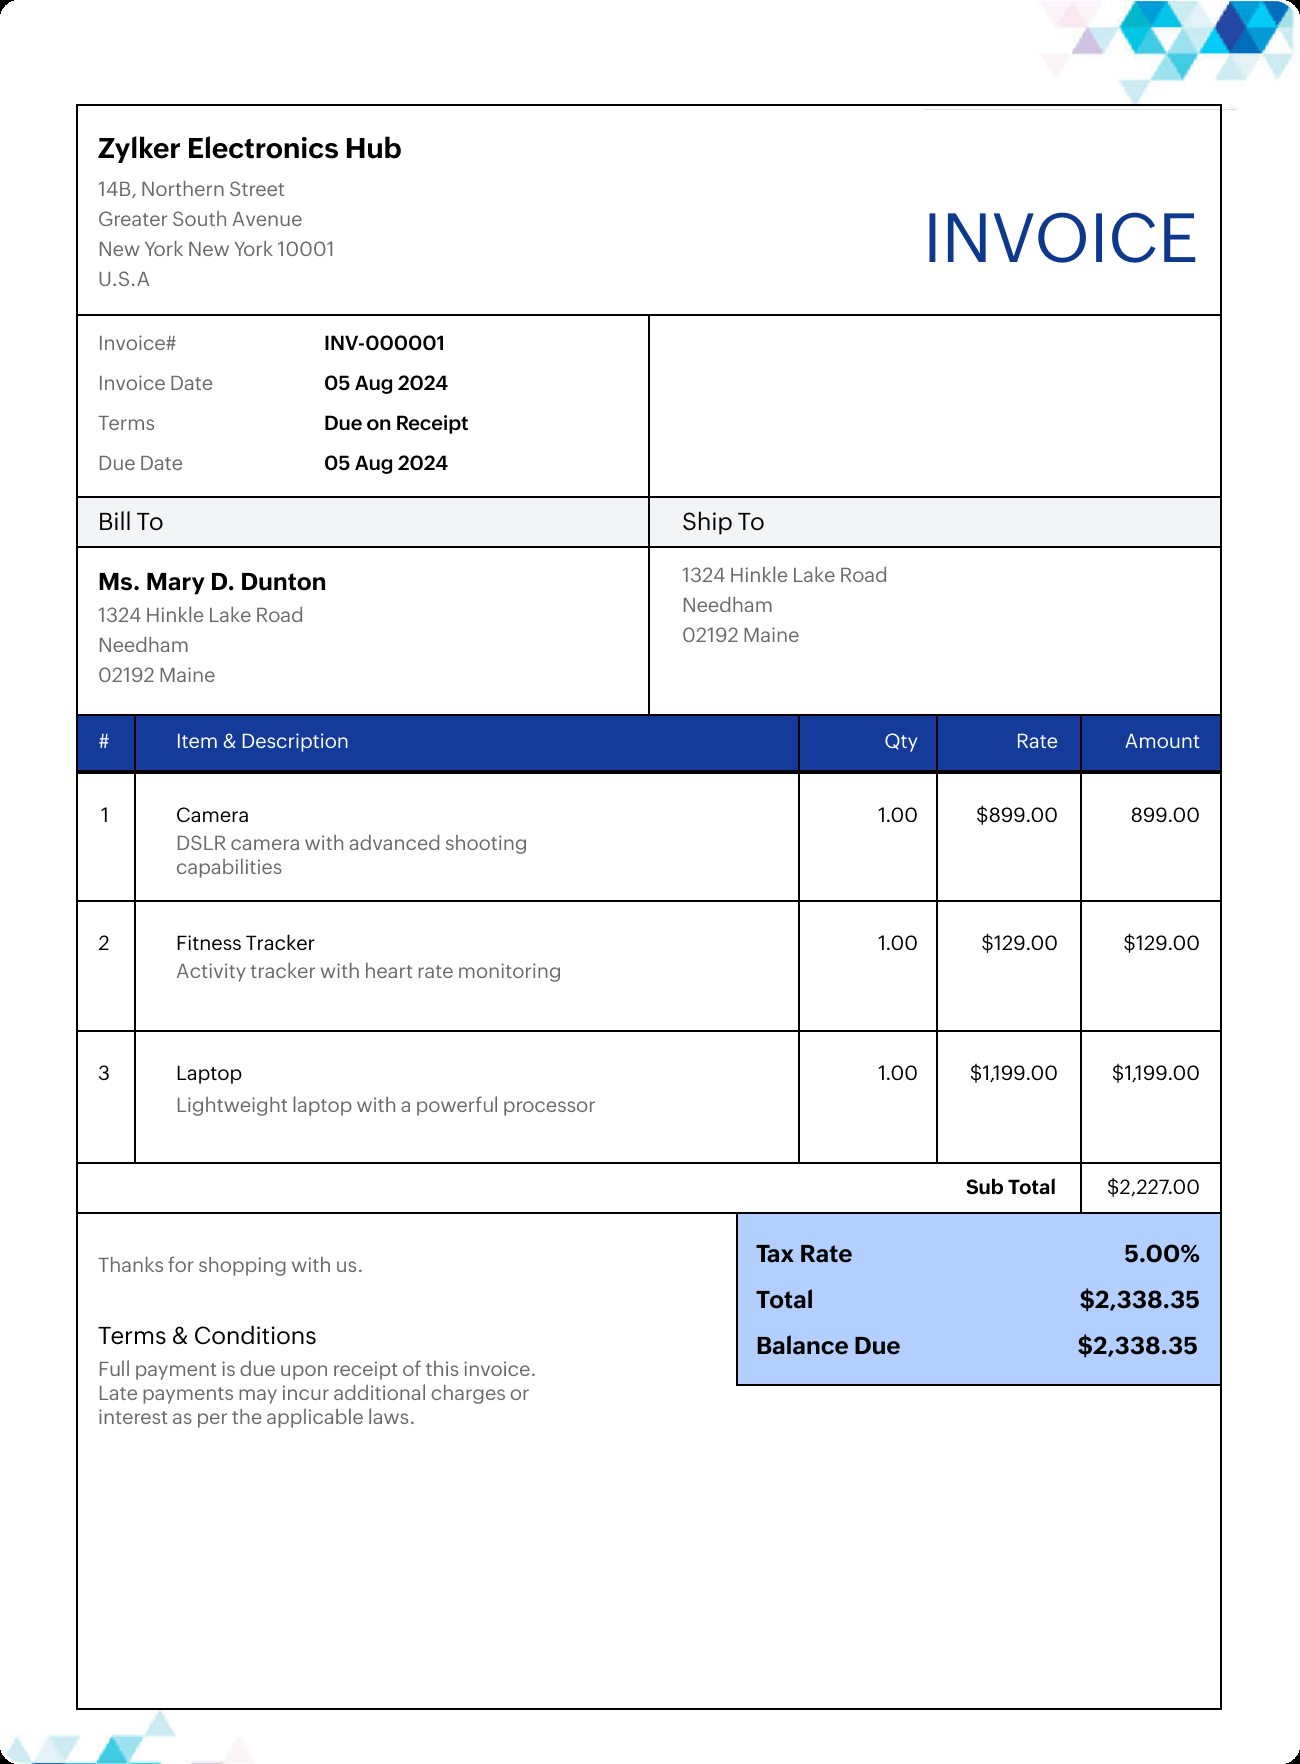

In [5]:
from IPython.display import display

display(invoice_image)

## Generate a custom schema

There's a scenario where you are receiving invoices of the similar format, you can generate schema, test and use it in ETL pipeline

In [6]:
generated_schema_response = client.image.schema(
    images=[invoice_image],
)

In [7]:
generated_schema_response.response

SchemaResponse(domain='custom.retail.invoice-general-20250313', description='Auto-generated schema', schema_version='20250313', schema_hash='e5543c6d6c185713a5223395ae85e31d04eb3389017caa644f19e707fca1b6ff', gql_stmt='{\n  invoice_number\n  invoice_date\n  terms\n  due_date\n  bill_to {\n    street\n    city\n    state\n    zip_code\n    country\n  }\n  ship_to {\n    street\n    city\n    state\n    zip_code\n    country\n  }\n  items {\n    description\n    quantity\n    rate\n    amount\n  }\n  sub_total\n  tax_rate\n  total\n  balance_due\n  notes\n  terms_conditions\n}', json_schema={'$defs': {'Address': {'properties': {'street': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'Street address', 'title': 'Street'}, 'city': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'City name', 'title': 'City'}, 'state': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'State or region', 'title

## Use the Generated Schema to extract structured data

In [8]:
from vlmrun.client.types import GenerationConfig

response = client.image.generate(
    images=[invoice_image],
    domain="document.q-and-a",
    config=GenerationConfig(
        json_schema=generated_schema_response.response.model_json_schema()
    )
)
print(response)

id='3099f2cd-3db8-4cb8-bae2-95c4c1c09d99' created_at=datetime.datetime(2025, 3, 13, 7, 37, 23, 381924) completed_at=datetime.datetime(2025, 3, 13, 7, 37, 31, 928609, tzinfo=TzInfo(UTC)) response=SchemaResponse(domain='Invoice', description='Invoice details from Zylker Electronics Hub with billed items, customer information, and payment terms.', schema_version='1.0', schema_hash='abc123', gql_stmt='query { invoice { company, invoice_number, date, terms, due_date, bill_to, ship_to, items { description, qty, rate, amount }, tax_rate, total, balance_due } }', json_schema={'company': 'Zylker Electronics Hub', 'address': '14B, Northern Street, Greater South Avenue, New York, New York 10001, U.S.A', 'invoice': {'invoice_number': 'INV-000001', 'invoice_date': '05 Aug 2024', 'terms': 'Due on Receipt', 'due_date': '05 Aug 2024'}, 'customer': {'bill_to': {'name': 'Ms. Mary D. Dunton', 'address': '1324 Hinkle Lake Road, Needham, 02192 Maine'}, 'ship_to': {'address': '1324 Hinkle Lake Road, Needham

## Display results

,Image,company,address,invoice,customer,items,sub_total,tax_rate,total,balance_due
0,,Zylker Electronics Hub,"14B, Northern Street, Greater South Avenue, New York, New York 10001, U.S.A","{'invoice_number': 'INV-000001', 'invoice_date': '05 Aug 2024', 'terms': 'Due on Receipt', 'due_date': '05 Aug 2024'}","{'bill_to': {'name': 'Ms. Mary D. Dunton', 'address': '1324 Hinkle Lake Road, Needham, 02192 Maine'}, 'ship_to': {'address': '1324 Hinkle Lake Road, Needham, 02192 Maine'}}","[{'description': 'Camera, DSLR camera with advanced shooting capabilities', 'qty': 1.0, 'rate': 899.0, 'amount': 899.0}, {'description': 'Fitness Tracker, Activity tracker with heart rate monitoring', 'qty': 1.0, 'rate': 129.0, 'amount': 129.0}, {'description': 'Laptop, Lightweight laptop with a powerful processor', 'qty': 1.0, 'rate': 1199.0, 'amount': 1199.0}]",2227.0,5.0,2338.35,2338.35

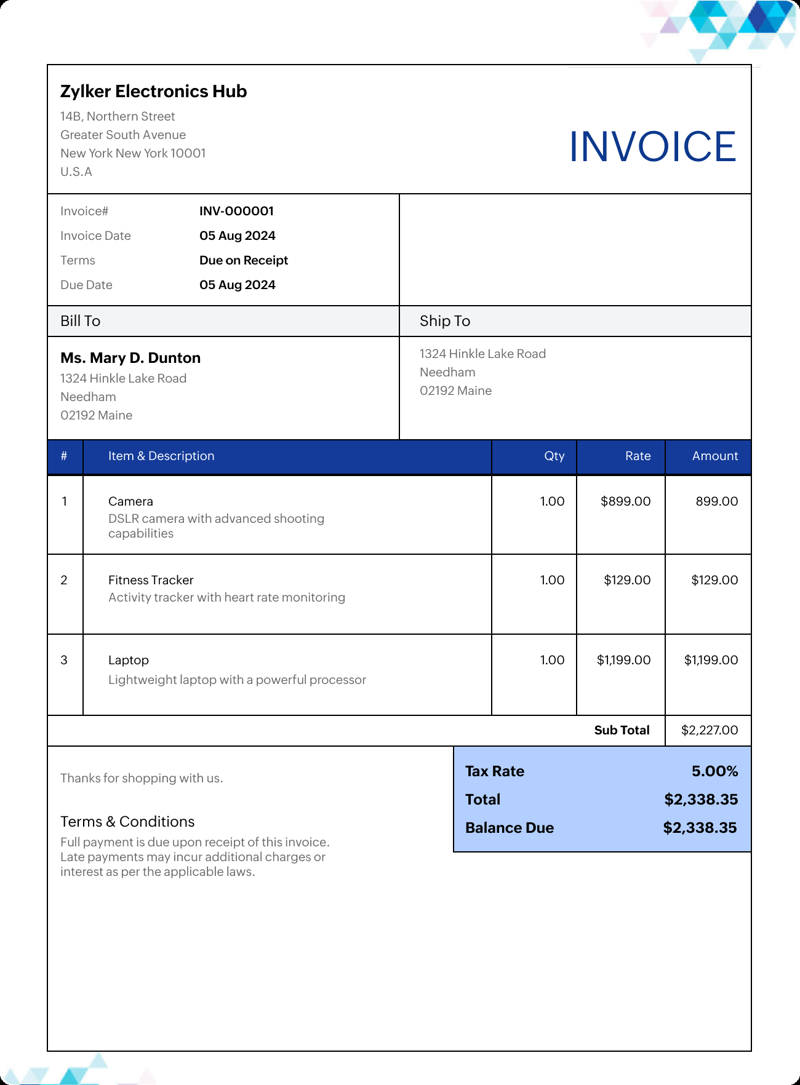

In [9]:
from vlmrun.common.viz import show_results

show_results(response.response.json_schema, [invoice_image])

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)